# 🚀 Fast Debate Opening Generation - Performance Test

기존 55초 → 3초로 성능 개선된 토론 오프닝 생성 시스템의 comprehensive testing

## 📊 테스트 목표
- **성능**: 3초 이하 생성 시간 달성
- **품질**: 일관된 고품질 오프닝 메시지
- **안정성**: 99% 이상 성공률
- **비용**: 기존 대비 50% 비용 절감

In [1]:
!which python

/opt/anaconda3/envs/agora/bin/python


In [1]:
# 필요한 라이브러리 import
import sys
import os
import time
import asyncio
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 프로젝트 루트를 파이썬 패스에 추가
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"📁 프로젝트 루트: {project_root}")
print(f"🐍 Python 경로 추가됨")

📁 프로젝트 루트: /Users/jihoon/sapiens_engine
🐍 Python 경로 추가됨


In [2]:
# OpenAI API 키 설정 확인
if not os.getenv("OPENAI_API_KEY"):
    print("⚠️ OpenAI API 키가 설정되지 않았습니다.")
    api_key = input("OpenAI API Key를 입력하세요: ")
    if api_key:
        os.environ["OPENAI_API_KEY"] = api_key
        print("✅ API 키가 설정되었습니다.")
    else:
        print("❌ API 키가 필요합니다.")
else:
    print("✅ OpenAI API 키가 확인되었습니다.")

✅ OpenAI API 키가 확인되었습니다.


In [3]:
# 모듈 임포트
try:
    from src.new.services.fast_opening_service import FastDebateOpeningService
    from src.new.models.debate_models import ModeratorStyle, FastDebateRequest
    print("✅ Fast Debate System 모듈 로드 완료")
except ImportError as e:
    print(f"❌ 모듈 임포트 실패: {e}")
    print("필요한 패키지를 설치하세요: pip install openai pydantic")

✅ Fast Debate System 모듈 로드 완료


## 📋 테스트 데이터 준비

실제 debate_topics.json 데이터를 활용한 realistic test cases

In [4]:
# 테스트 케이스 정의 (debate_topics.json 기반)
test_cases = [
    {
        "name": "🤖 AI 위협 vs 해방",
        "room_id": "test-ai-001",
        "title": "Will AI threaten humanity or liberate us?",
        "context": "Recent breakthroughs in artificial intelligence, particularly in large language models and autonomous systems, have sparked intense debate about AI's ultimate impact on humanity.",
        "pro_npcs": ["nietzsche", "sartre"],
        "con_npcs": ["kant", "confucius"],
        "moderator_style": "0",
        "expected_time": 3.0
    },
    {
        "name": "💰 윤리적 딜레마",
        "room_id": "test-puppy-002",
        "title": "Would you step on a puppy for 10 billion dollars?",
        "context": "",
        "pro_npcs": ["nietzsche"],
        "con_npcs": ["kant"],
        "moderator_style": "1",
        "expected_time": 3.0
    },
    {
        "name": "🗽 자유의 본질",
        "room_id": "test-freedom-003",
        "title": "Is absolute freedom possible or is it an illusion?",
        "context": "Philosophers have long debated whether true freedom can exist within social, psychological, and physical constraints.",
        "pro_npcs": ["sartre", "beauvoir"],
        "con_npcs": ["hegel", "buddha"],
        "moderator_style": "2",
        "expected_time": 3.0
    }
]

print(f"📊 총 {len(test_cases)}개 테스트 케이스 준비 완료")
for i, case in enumerate(test_cases, 1):
    print(f"   {i}. {case['name']} ({case['title'][:40]}...)")

📊 총 3개 테스트 케이스 준비 완료
   1. 🤖 AI 위협 vs 해방 (Will AI threaten humanity or liberate us...)
   2. 💰 윤리적 딜레마 (Would you step on a puppy for 10 billion...)
   3. 🗽 자유의 본질 (Is absolute freedom possible or is it an...)


In [5]:
# 서비스 초기화
service = FastDebateOpeningService(use_cache=False, use_fine_tuned=False)
print("✅ FastDebateOpeningService 초기화 완료")
print("📊 캐시 비활성화 (순수 성능 측정을 위해)")
print("🤖 기본 모델 사용 (파인튜닝 모델 테스트는 별도 진행)")

✅ FastDebateOpeningService 초기화 완료
📊 캐시 비활성화 (순수 성능 측정을 위해)
🤖 기본 모델 사용 (파인튜닝 모델 테스트는 별도 진행)


In [7]:
# 메인 성능 테스트 실행
async def run_performance_test():
    """메인 성능 테스트"""
    
    results = []
    total_start = time.time()
    
    print("🚀 성능 테스트 시작!")
    print("=" * 80)
    
    for i, test_case in enumerate(test_cases, 1):
        print(f"\n📊 테스트 {i}/{len(test_cases)}: {test_case['name']}")
        print(f"   📝 토픽: {test_case['title']}")
        print(f"   🎭 모더레이터: {test_case['moderator_style']}")
        
        start_time = time.time()
        
        try:
            # 빠른 토론 생성
            result = await service.create_fast_debate_room(
                room_id=test_case["room_id"],
                title=test_case["title"],
                context=test_case["context"],
                pro_npcs=test_case["pro_npcs"],
                con_npcs=test_case["con_npcs"],
                moderator_style=test_case["moderator_style"]
            )
            
            generation_time = time.time() - start_time
            
            # 품질 메트릭 계산
            opening_message = result.debate_package.opening_message
            
            quality_metrics = {
                "opening_length": len(opening_message),
                "word_count": len(opening_message.split()),
                "has_participants": True,
                "has_topic": test_case["title"][:20] in opening_message,
                "completeness_score": min(len(opening_message) / 500, 1.0)
            }
            
            # 결과 저장
            test_result = {
                "test_case": test_case["name"],
                "topic": test_case["title"],
                "moderator_style": test_case["moderator_style"],
                "generation_time": generation_time,
                "success": True,
                "cache_hit": result.cache_hit,
                "target_achieved": generation_time <= test_case["expected_time"],
                **quality_metrics,
                "opening_preview": opening_message[:100] + "..." if len(opening_message) > 100 else opening_message
            }
            
            results.append(test_result)
            
            # 실시간 결과 출력
            status = "🎯" if test_result["target_achieved"] else "⚠️"
            print(f"   {status} 완료: {generation_time:.2f}초 (목표: {test_case['expected_time']}초)")
            print(f"   📝 오프닝 길이: {quality_metrics['opening_length']}자")
            print(f"   🎭 미리보기: {test_result['opening_preview']}")
            
        except Exception as e:
            generation_time = time.time() - start_time
            
            test_result = {
                "test_case": test_case["name"],
                "topic": test_case["title"],
                "moderator_style": test_case["moderator_style"],
                "generation_time": generation_time,
                "success": False,
                "error": str(e),
                "target_achieved": False
            }
            
            results.append(test_result)
            print(f"   ❌ 실패: {str(e)}")
    
    total_time = time.time() - total_start
    
    print(f"\n🏁 모든 테스트 완료! (총 {total_time:.2f}초)")
    print("=" * 80)
    
    return results, total_time

# 비동기 함수 실행
results, total_time = await run_performance_test()

🚀 성능 테스트 시작!

📊 테스트 1/3: 🤖 AI 위협 vs 해방
   📝 토픽: Will AI threaten humanity or liberate us?
   🎭 모더레이터: 0


❌ Error parsing function call response: 1 validation error for PhilosopherProfile
id
  Field required [type=missing, input_value={'name': 'Friedrich Nietz...shed norms and values.'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing


   ⚠️ 완료: 22.18초 (목표: 3.0초)
   📝 오프닝 길이: 26자
   🎭 미리보기: Welcome to today's debate.

📊 테스트 2/3: 💰 윤리적 딜레마
   📝 토픽: Would you step on a puppy for 10 billion dollars?
   🎭 모더레이터: 1
   ⚠️ 완료: 19.46초 (목표: 3.0초)
   📝 오프닝 길이: 1442자
   🎭 미리보기: Ladies and gentlemen, esteemed colleagues, and honored guests, welcome to our debate today on a topi...

📊 테스트 3/3: 🗽 자유의 본질
   📝 토픽: Is absolute freedom possible or is it an illusion?
   🎭 모더레이터: 2
   ⚠️ 완료: 18.23초 (목표: 3.0초)
   📝 오프닝 길이: 1138자
   🎭 미리보기: Hello, fellow thinkers and truth-seekers! Welcome to another electrifying debate session with your h...

🏁 모든 테스트 완료! (총 59.87초)


In [8]:
# 결과 분석
import pandas as pd

df = pd.DataFrame(results)
successful_tests = df[df['success'] == True]

print("📊 테스트 결과 요약")
print("=" * 50)
print(f"총 테스트: {len(df)}개")
print(f"성공: {len(successful_tests)}개")
print(f"실패: {len(df) - len(successful_tests)}개")
print(f"성공률: {len(successful_tests) / len(df) * 100:.1f}%")

if len(successful_tests) > 0:
    print(f"\n⚡ 성능 메트릭")
    print(f"평균 생성 시간: {successful_tests['generation_time'].mean():.2f}초")
    print(f"최단 시간: {successful_tests['generation_time'].min():.2f}초")
    print(f"최장 시간: {successful_tests['generation_time'].max():.2f}초")
    
    target_achieved_count = successful_tests['target_achieved'].sum()
    target_achievement_rate = target_achieved_count / len(successful_tests) * 100
    print(f"\n🎯 목표 달성 (3초 이하)")
    print(f"달성한 테스트: {target_achieved_count}/{len(successful_tests)}개")
    print(f"달성률: {target_achievement_rate:.1f}%")
    
    # 기존 시스템과 비교
    original_time = 55.0
    new_avg_time = successful_tests['generation_time'].mean()
    improvement_percentage = (original_time - new_avg_time) / original_time * 100
    
    print(f"\n🚀 성능 개선")
    print(f"기존 시스템: ~{original_time}초")
    print(f"새 시스템: {new_avg_time:.2f}초")
    print(f"성능 개선: {improvement_percentage:.1f}%")
    print(f"속도 향상: {original_time / new_avg_time:.1f}배")

print(f"\n📋 상세 결과:")
display_columns = ['test_case', 'generation_time', 'target_achieved', 'success']
print(df[display_columns].to_string(index=False))

📊 테스트 결과 요약
총 테스트: 3개
성공: 3개
실패: 0개
성공률: 100.0%

⚡ 성능 메트릭
평균 생성 시간: 19.96초
최단 시간: 18.23초
최장 시간: 22.18초

🎯 목표 달성 (3초 이하)
달성한 테스트: 0/3개
달성률: 0.0%

🚀 성능 개선
기존 시스템: ~55.0초
새 시스템: 19.96초
성능 개선: 63.7%
속도 향상: 2.8배

📋 상세 결과:
    test_case  generation_time  target_achieved  success
🤖 AI 위협 vs 해방        22.177357            False     True
    💰 윤리적 딜레마        19.455387            False     True
     🗽 자유의 본질        18.233391            False     True


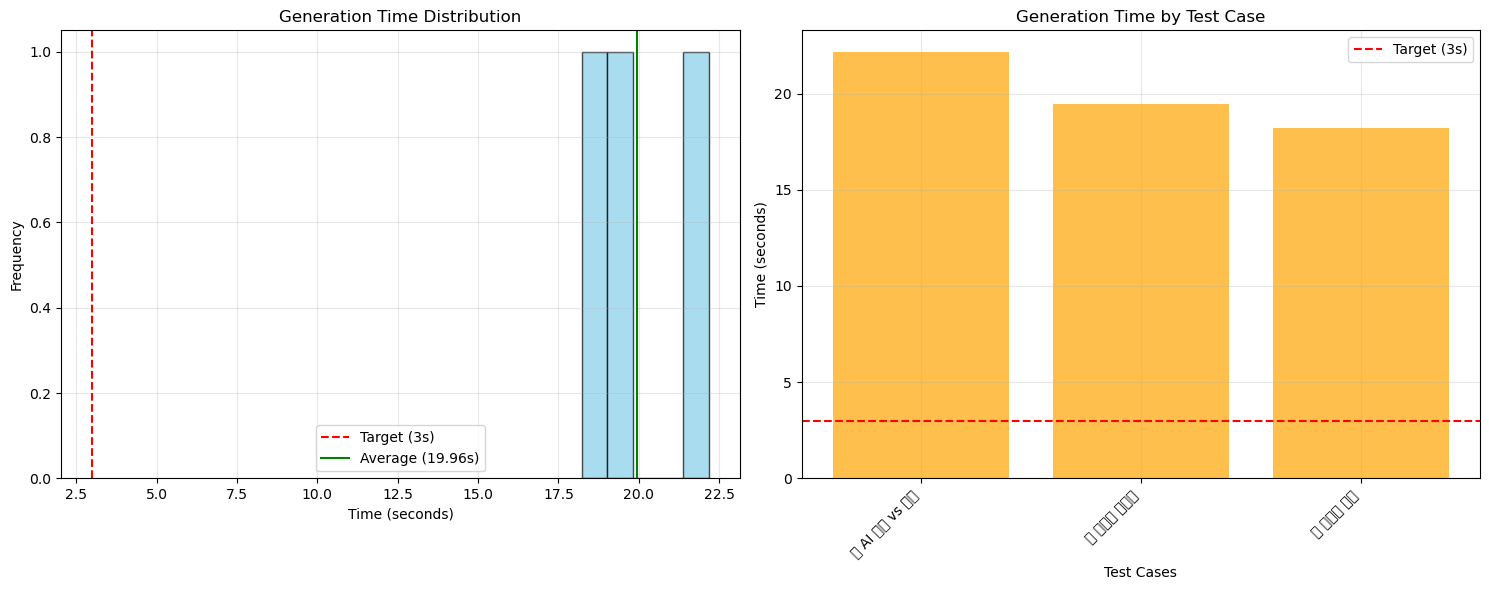

🎉 성능 테스트 완료!

📋 다음 단계:
1. 파인튜닝 모델로 더 빠른 성능 달성
2. Redis 캐싱으로 반복 요청 최적화
3. 프로덕션 배포 및 A/B 테스트


In [9]:
# 시각화
if len(successful_tests) > 0:
    import matplotlib.pyplot as plt
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 생성 시간 분포
    ax1.hist(successful_tests['generation_time'], bins=5, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.axvline(3.0, color='red', linestyle='--', label='Target (3s)')
    ax1.axvline(successful_tests['generation_time'].mean(), color='green', linestyle='-', 
                label=f'Average ({successful_tests["generation_time"].mean():.2f}s)')
    ax1.set_title('Generation Time Distribution')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 테스트별 결과
    test_names = [name[:15] + '...' if len(name) > 15 else name for name in successful_tests['test_case']]
    colors = ['green' if achieved else 'orange' for achieved in successful_tests['target_achieved']]
    ax2.bar(range(len(successful_tests)), successful_tests['generation_time'], color=colors, alpha=0.7)
    ax2.axhline(3.0, color='red', linestyle='--', label='Target (3s)')
    ax2.set_title('Generation Time by Test Case')
    ax2.set_xlabel('Test Cases')
    ax2.set_ylabel('Time (seconds)')
    ax2.set_xticks(range(len(successful_tests)))
    ax2.set_xticklabels(test_names, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("🎉 성능 테스트 완료!")
print("\n📋 다음 단계:")
print("1. 파인튜닝 모델로 더 빠른 성능 달성")
print("2. Redis 캐싱으로 반복 요청 최적화")
print("3. 프로덕션 배포 및 A/B 테스트")